In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_excel("/content/marketing_campgain.xlsx")
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0


### So we will be working on promotion done by the company and evaluate results

In [3]:
# so we gone consider only promotion columns and drop other
# which are NumDealsPurchases: Number of purchases made with a discount
# AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
# AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
# AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
# AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
# AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
# Response: 1 if customer accepted the offer in the last campaign, 0 otherwise

data=df[['NumDealsPurchases','AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4', 'AcceptedCmp5','Response']]
data

,NumDealsPurchases,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response
0,3,0,0,0,0,0,1
1,2,0,0,0,0,0,0
2,1,0,0,0,0,0,0
3,2,0,0,0,0,0,0
4,5,0,0,0,0,0,0
...,...,...,...,...,...,...,...
2235,2,0,0,0,0,0,0
2236,7,1,0,0,0,0,0
2237,1,0,0,0,1,0,0
2238,2,0,0,0,0,0,0


In [4]:
data.rename(columns = {'AcceptedCmp1': '1st campaign', 'AcceptedCmp2': '2nd campaign', 'AcceptedCmp3': '3rd campaign', 'AcceptedCmp4': '4th campaign', 'AcceptedCmp5': '5th campaign'}, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [5]:
data.head(5)

,NumDealsPurchases,1st campaign,2nd campaign,3rd campaign,4th campaign,5th campaign,Response
0,3,0,0,0,0,0,1
1,2,0,0,0,0,0,0
2,1,0,0,0,0,0,0
3,2,0,0,0,0,0,0
4,5,0,0,0,0,0,0


In [6]:
data.isnull().sum()
# There are no null values

NumDealsPurchases    0
1st campaign         0
2nd campaign         0
3rd campaign         0
4th campaign         0
5th campaign         0
Response             0
dtype: int64

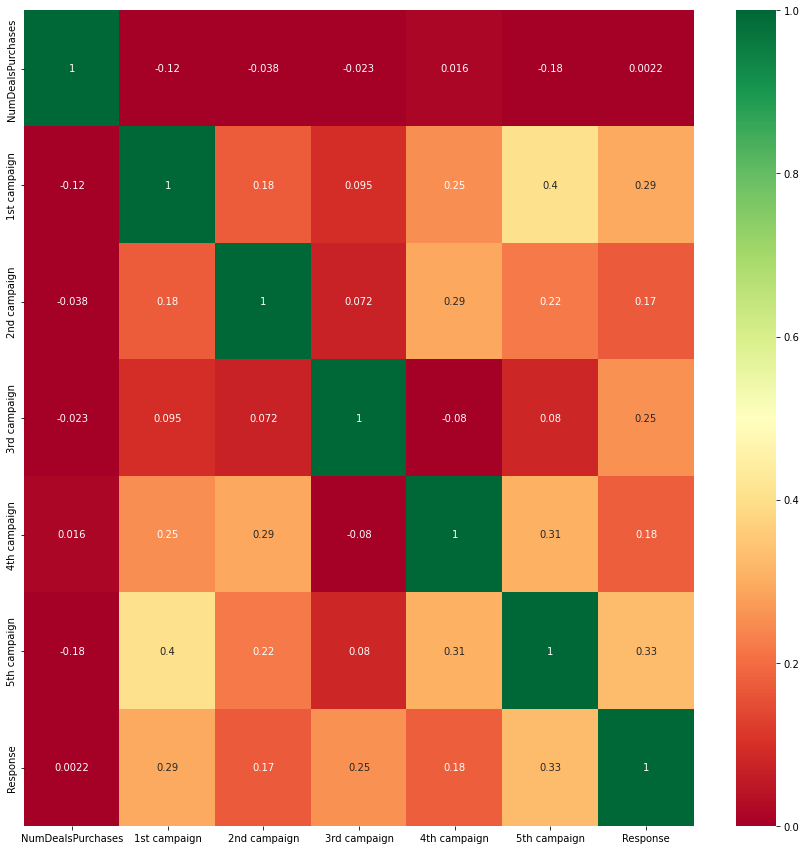

In [7]:
plt.figure(figsize=(15,15))
sns.heatmap(data.corr(),vmin=0,vmax=1,annot=True,robust=True,cmap="RdYlGn")

In [8]:
# Splitting indepedent and dependent variables
# here Response is target variable

x=data.iloc[:,0:6]
x

,NumDealsPurchases,1st campaign,2nd campaign,3rd campaign,4th campaign,5th campaign
0,3,0,0,0,0,0
1,2,0,0,0,0,0
2,1,0,0,0,0,0
3,2,0,0,0,0,0
4,5,0,0,0,0,0
...,...,...,...,...,...,...
2235,2,0,0,0,0,0
2236,7,1,0,0,0,0
2237,1,0,0,0,1,0
2238,2,0,0,0,0,0


In [9]:
y=data.iloc[:,-1]
y

0       1
1       0
2       0
3       0
4       0
       ..
2235    0
2236    0
2237    0
2238    0
2239    1
Name: Response, Length: 2240, dtype: int64

In [10]:
y.value_counts()

0    1906
1     334
Name: Response, dtype: int64

In [11]:
# Checking Feature Importance
from sklearn.ensemble import ExtraTreesClassifier

ETR=ExtraTreesClassifier()
ETR.fit(x,y)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [12]:
print(ETR.feature_importances_)

[0.2018752  0.20136116 0.04973855 0.21780831 0.04634547 0.28287131]


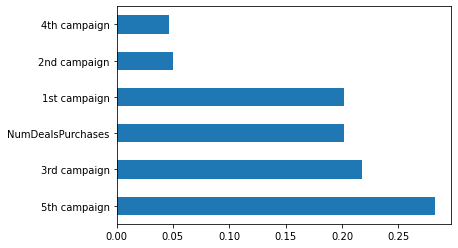

In [13]:
feat_importances=pd.Series(ETR.feature_importances_,index=x.columns)
feat_importances.nlargest(6).plot(kind="barh")

In [14]:
# Train and Test splitting

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [15]:
x_train

,NumDealsPurchases,1st campaign,2nd campaign,3rd campaign,4th campaign,5th campaign
792,1,0,0,1,0,0
1271,3,0,0,0,0,0
1538,3,0,0,0,1,0
668,1,0,0,0,0,0
1975,0,0,0,0,0,0
...,...,...,...,...,...,...
1638,2,0,0,0,0,0
1095,1,0,0,0,0,0
1130,4,0,0,0,1,0
1294,2,0,0,0,0,0


In [16]:
x_test

,NumDealsPurchases,1st campaign,2nd campaign,3rd campaign,4th campaign,5th campaign
324,6,0,0,0,0,0
96,5,0,0,0,1,0
2104,1,0,0,0,0,0
1259,1,1,0,0,0,1
1061,2,0,0,1,0,0
...,...,...,...,...,...,...
423,1,0,0,0,1,1
1340,1,0,0,0,1,0
755,1,0,0,0,0,0
2138,1,0,0,0,0,0


In [17]:
# Building a Model using xgboost Classifier

from xgboost import XGBClassifier

xgb=XGBClassifier()
xgb.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [18]:
y_pred_train=xgb.predict(x_train)
y_pred=xgb.predict(x_test)

In [19]:
from sklearn.metrics import *
from sklearn import metrics

In [20]:
# training score
accuracy_score(y_train,y_pred_train)

0.8772321428571429

In [21]:
# testing score
accuracy_score(y_test,y_pred)

0.859375

In [22]:
print('MAE:',metrics.mean_absolute_error(y_test,y_pred))
print('MSE:',metrics.mean_squared_error(y_test,y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

MAE: 0.140625
MSE: 0.140625
RMSE: 0.375


## Hyperparameter Tuning and making balanced data

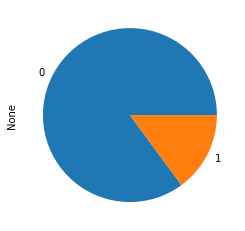

In [23]:
# data is quiet imbalanced
data.groupby('Response').size().plot(kind = 'pie')
sns.set(rc={'figure.figsize':(8,8)})

In [24]:
## SMOT(Synthetic Minority oversampling Technique)

from imblearn.over_sampling import SMOTE
SMO=SMOTE(k_neighbors=5)

x_smo,y_smo=SMO.fit_sample(x_train,y_train)  

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [25]:
x_smo=pd.DataFrame(x_smo, columns = ['NumDealsPurchases',	'1st campaign',	'2nd campaign', '3rd campaign'	, '4th campaign',	'5th campaign'])

In [26]:
x_smo

,NumDealsPurchases,1st campaign,2nd campaign,3rd campaign,4th campaign,5th campaign
0,1,0,0,1,0,0
1,3,0,0,0,0,0
2,3,0,0,0,1,0
3,1,0,0,0,0,0
4,0,0,0,0,0,0
...,...,...,...,...,...,...
3049,10,0,0,0,0,0
3050,6,0,0,0,0,0
3051,2,0,0,0,0,0
3052,1,0,0,0,0,0


In [27]:
y_smo=pd.DataFrame(y_smo)

In [28]:
y_smo.value_counts()

1    1527
0    1527
dtype: int64

In [29]:
## Hyperparameter tuning using GridSearchCV

from sklearn.model_selection import GridSearchCV

# no of trees in RF
n_estimators=list(np.linspace(start=10,stop=100,num=10,dtype="int"))

#various learning rate parameters
learning_rate=['0.01','0.1','0.5','1']

# max no of levels of tree
max_depth=np.linspace(5,10,num=5,dtype="int")

#subsample parameter values( Subsample ratio of the training instance.)
subsample =[0.7,0.8,0.9]

#minimum child weight parameters(Minimum sum of instance weight(hessian) needed in a child)
min_child_weight=[3,4,5]

In [30]:
# creating param grid
param_grid= {"n_estimators":n_estimators,
            "learning_rate":learning_rate,
             "max_depth":max_depth,
             "subsample":subsample,
             "min_child_weight":min_child_weight}

print(param_grid)

{'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100], 'learning_rate': ['0.01', '0.1', '0.5', '1'], 'max_depth': array([ 5,  6,  7,  8, 10]), 'subsample': [0.7, 0.8, 0.9], 'min_child_weight': [3, 4, 5]}


In [31]:
xgb=XGBClassifier()
xgbC=GridSearchCV(xgb,param_grid=param_grid,scoring='accuracy', n_jobs=-1, cv=5, verbose=3)

In [32]:
xgbC.fit(x_train,y_train)

Fitting 5 folds for each of 1800 candidates, totalling 9000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   20.2s
[Parallel(n_jobs=-1)]: Done 1074 tasks      | elapsed:   48.8s
[Parallel(n_jobs=-1)]: Done 1970 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 3122 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 4530 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 6194 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done 8114 tasks      | elapsed:  6.5min
[Parallel(n_jobs=-1)]: Done 9000 out of 9000 | elapsed:  7.3min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_po...seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=-1,
             param_grid={'learning_rate': ['0.01', '0.1', '0.5', '1'],
                         'max_depth': array([ 5,  6,  7,  8, 10]),
                         'min_child_weight': [3, 4

In [33]:
xgbC.best_score_

0.8705326714492461

In [34]:
xgbC.best_params_

{'learning_rate': '1',
 'max_depth': 7,
 'min_child_weight': 4,
 'n_estimators': 40,
 'subsample': 0.8}

In [35]:
y_pred_train=xgbC.predict(x_train)
y_pred=xgbC.predict(x_test)

In [36]:
# Train score
accuracy_score(y_train,y_pred_train)

0.8800223214285714

In [37]:
# Test score
accuracy_score(y_test,y_pred)

0.8415178571428571

In [38]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.95      0.91       379
           1       0.47      0.26      0.34        69

    accuracy                           0.84       448
   macro avg       0.67      0.60      0.62       448
weighted avg       0.81      0.84      0.82       448



In [39]:
import joblib 
joblib.dump(xgbC,"marketing.pkl")

['marketing.pkl']

In [40]:
# Checking Predictions
values=np.array([[5,1,0,0,0,1]])
values

array([[5, 1, 0, 0, 0, 1]])

In [41]:
predictions=pd.DataFrame(values, columns = ['NumDealsPurchases',	'1st campaign',	'2nd campaign', '3rd campaign'	, '4th campaign',	'5th campaign'])

In [42]:
predictions

,NumDealsPurchases,1st campaign,2nd campaign,3rd campaign,4th campaign,5th campaign
0,5,1,0,0,0,1


In [43]:
output=xgbC.predict(predictions)
output

array([1])

## Customer accepted the offer mostly when their is purchases made with a discount and also people influenced more with 1st campaign and last comapaign then other compaigns